In [ ]:
Exploratory Data Analysis Section

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')


65
56


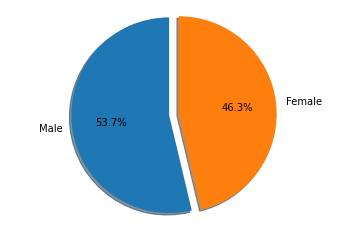

In [29]:
#Pieplot for Ages

gender = dataframe['SEX']
male = 0
female = 0
for i in gender:
    if i == 'Male':
        male += 1
    if i == 'Female':
        female += 1
print(male)
print(female)
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59",
          "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [male,female]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:

sns.set_theme(style="darkgrid")

g = sns.jointplot(x="YRS CLIMBING", y="PEAK FORCE (KG)", data=dataframe,
                  kind="reg", truncate=False,
                  xlim=(0, 40), ylim=(30, 80),
                  color="m", height=7)
